# Proyek Analisis Data: Air-quality-dataset
- **Nama:** Tahira Aliyya
- **Email:** tahiraaliyya@gmail.com
- **ID Dicoding:** MC002D5X1710

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi pencemaran udara yang terjadi pada 12 stasiun di china dalam beberpa waktu terakhir?
- Apakah faktor alam seperti hujan, tekanan dan temperatur mempengaruhi kadar unsur yang mencemari udara di stasiun china tersebut?

## Import Semua Packages/Library yang Digunakan

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import folium
import glob

## Data Wrangling

### Gathering Data

In [52]:
file_list = glob.glob("PRSA_Data/*.csv")

PRSA_df = pd.concat((pd.read_csv(file) for file in file_list), ignore_index=True)

**Insight:**
- Proses pengumpulan data dilakukan dengan meyatukan semua file yang ada di folder PRSA_data
- Tabel-tabel yang ada di fil-file PRSA_data memiliki kolom-kolom yang sama, dengan demikian kita hanya perlu menggabungkan tabel-tabel itu dengan    menyatukan seluruh baris-baris pada file-file di folder PRSA_data.
- Proses penyatuan tabel dilakukan dengan memanfaatkan library global untuk memanggil folder PRSA_data dan library pandas dengan tipe concat untuk menyatukan tabel.

### Assessing Data

In [53]:
PRSA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**Insight:**
- Terdapat missing value pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSP yang ditandai dengan jumlah data non-null di kolom tersebut tak sama dengan jumlah baris pada data yaitu 420768 buah. (dapat dilihat pada banyak non-null dari kolom 'No')
- Untuk waktu pengamatan, tahun, bulan dan hari masih dipisah menjadi kolom terpisah dengan tipe data int64. Ini nantinya akan diubah menjadi satu kolom dengan tipe data datetime.

In [54]:
PRSA_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

**Insight:**
Pada bagian ini kita memeriksa jumlah data yang bernilai NA pada tiap kolom. Selaras dengan hasil investigasi sebelumnya, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM masih memiliki data bernilai NA. Data bernilai NA ini nantinya akan diisi oleh sautu bilangan atau keterangan.

In [55]:
print("Jumlah duplikasi : ", PRSA_df.duplicated().sum())

Jumlah duplikasi :  0


**Insight:**
Pada bagian ini diperiksa apakah ada duplikasi data. Karena ouputnya adalah 'Jumlah duplikasi : 0', artinya tidak ada yang sama dan semuanya unik.

In [56]:
PRSA_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
Pada bagian ini diperiksa apakah ada missing value pada data. Namun semua statistika deskriptif tampak aman, tidak ada nilai maksimum atau minimum yang berlebihan ataupun pada nilai std, Q1, Q2, Q3, count, mean.

### Cleaning Data

In [57]:
NUMBER_OF_ROW_FOR_EVERY_STATION = 35064

# Konversi kolom ke tipe numerik jika masih ada yang object
PRSA_columns = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "RAIN", "DEWP", "WSPM", "PRES"]
for column in PRSA_columns:
    # Untuk menghindari warning objek, pastikan semua tipe data pada tiap kolom adalah  numeric
    # PRSA_df[column] = pd.to_numeric(PRSA_df[column])
    # Lakukan interpolasi
    PRSA_df[column] = PRSA_df[column].interpolate(method='linear', limit_direction='forward')

for i in range(12):
    modus_wd = PRSA_df.loc[0*i:NUMBER_OF_ROW_FOR_EVERY_STATION, "wd"].mode()
    PRSA_df['wd'] = PRSA_df['wd'].fillna(value=str(modus_wd))

# PRSA_df["hour"] = pd.to_timedelta(PRSA_df["hour"], unit="h")

PRSA_df["date"] = pd.to_datetime(PRSA_df[["year", "month", "day", "hour"]])
PRSA_df.drop(columns=["year", "month", "day"], inplace=True)

PRSA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   hour     420768 non-null  int64         
 2   PM2.5    420768 non-null  float64       
 3   PM10     420768 non-null  float64       
 4   SO2      420768 non-null  float64       
 5   NO2      420768 non-null  float64       
 6   CO       420768 non-null  float64       
 7   O3       420768 non-null  float64       
 8   TEMP     420768 non-null  float64       
 9   PRES     420768 non-null  float64       
 10  DEWP     420768 non-null  float64       
 11  RAIN     420768 non-null  float64       
 12  wd       420768 non-null  object        
 13  WSPM     420768 non-null  float64       
 14  station  420768 non-null  object        
 15  date     420768 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
m

**Insight:**
- Mengisi nilai kosong pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP,RAIN, WSPM dengan nilai interpolasi.
- Menggabungkan kolom year, month, day menjadi satu kolom dengan tipe data datetime64
- Menghapus kolom year, month, dan day setelah dibentuk kolom baru yang isisnya gabungan kolom-kolom tersebut.
- Mengubah tipe data kolom hour manjadi timedelta64.
- Mengisi nilai NA pada kolom 'wd' dengan modusnya.
- Setelah dilakukan proses cleaning data, dapat dilihat bahwa data sudah erlihat baik, dimana semua kolom memeliki jumlah baris tak bernilai NA sama yaitu 420768 buah.

## Exploratory Data Analysis (EDA)

In [110]:
PRSA_df.describe(include="all")

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064,NaN
mean,17532.500000,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN,2015-03-01 11:30:00.000001024
min,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


**Insight:**
- Pada tabel tersebut terdapat beberapa baris yang menghasilkan nilai NAN seperti pada baris unique, top dan freq. Hal ini karena data-data pada kolom-kolom yang bernilai NAN tersebut bertipe numerik. Sementar unique, top, dan freq lebih relevan untuk data kategori.
- Ringkasan nilai rerata, variansi, Q1, Q2, Q3, maksimum, minimum dan lainnya untuk semua kolom pada tabel PRSA_df dapat dilihat pada tabel tersebut.

### Explore Data Kolom 'RAIN' pada PRSA_df

In [58]:
PRSA_df.groupby(by="station").agg({
    "station" : "nunique",
    "RAIN" : ["max", "min", "mean", "std"]
})

station  RAIN                         
              nunique   max  min      mean       std
station                                             
Aotizhongxin        1  72.5  0.0  0.067383  0.909798
Changping           1  52.1  0.0  0.060293  0.752357
Dingling            1  52.1  0.0  0.060293  0.752357
Dongsi              1  46.4  0.0  0.063983  0.786059
Guanyuan            1  72.5  0.0  0.067383  0.909798
Gucheng             1  41.9  0.0  0.064374  0.838142
Huairou             1  45.9  0.0  0.067950  0.848524
Nongzhanguan        1  46.4  0.0  0.063983  0.786059
Shunyi              1  37.3  0.0  0.061010  0.761118
Tiantan             1  46.4  0.0  0.063983  0.786059
Wanliu              1  72.5  0.0  0.068224  0.896471
Wanshouxigong       1  46.4  0.0  0.064285  0.796766

**Insight:**
- Berdasarkan rangkuman parameter sttistik di atas, diperoleh informasi bahwa curah hujan semua stasiun berada di rentang 72.5 hingga 0 mm.
- Rata-rata curah hujan masing-masing stasiun berada di rentang 0.060293-0.068224 mm yang artinya tiap stasiun memiliki rata-rata yanag hampir serupa.
- Standara deviasi stasiun-stasiun tersebut berada di rentang 0.752357-0.909798 mm. Standar deviasi stasiun-stasiu tersebut tidak jauh berbeda, sehingga penyebaran data curah hujan tiap stasiun tidak jauh berbeda.

### Explore Data pada kolom 'TEMP' di PRSA_df

In [59]:
PRSA_df.groupby(by="station").agg({
    "station" : "nunique",
    "TEMP" : ["max", "min", "mean", "std"]
})

station  TEMP                            
              nunique   max   min       mean        std
station                                                
Aotizhongxin        1  40.5 -16.8  13.581414  11.400426
Changping           1  41.4 -16.6  13.671605  11.367457
Dingling            1  41.4 -16.6  13.671605  11.367457
Dongsi              1  41.1 -16.8  13.668250  11.459735
Guanyuan            1  40.5 -16.8  13.581414  11.400426
Gucheng             1  41.6 -15.6  13.855824  11.294955
Huairou             1  40.3 -19.9  12.430556  11.754318
Nongzhanguan        1  41.1 -16.8  13.668250  11.459735
Shunyi              1  40.6 -16.8  13.375531  11.484913
Tiantan             1  41.1 -16.8  13.668250  11.459735
Wanliu              1  40.5 -15.8  13.425795  11.348183
Wanshouxigong       1  40.6 -16.8  13.781808  11.386144

**Insight:**
- Berdasarkan rangkuman parameter sttistik di atas, diperoleh informasi bahwa temperatur semua stasiun berada di rentang 41.4 hingga -19.9 derajat celcius. Nilai maksium dan minimum temperatur semua stasiun juga tidak jauh berbeda. 
- Rata-rata temperatur masing-masing stasiun berada di rentang 13.581414 hingga 13.855824 derajat celcius yang artinya tiap stasiun memiliki rata-rata yanag hampir serupa.
- Standara deviasi stasiun-stasiun tersebut berada di rentang 11.294955-11.754318 derajat celcius. Standar deviasi stasiun-stasiu tersebut tidak jauh berbeda, sehingga penyebaran data curah hujan tiap stasiun tidak jauh berbeda.

### Explore Data pada kolom 'PRES' di PRSA_df

In [60]:
PRSA_df.groupby(by="station").agg({
    "station" : "nunique",
    "PRES" : ["max", "min", "mean", "std"]
})

station    PRES                               
              nunique     max    min         mean        std
station                                                     
Aotizhongxin        1  1042.0  985.9  1011.851650  10.404517
Changping           1  1036.5  982.4  1007.771151  10.226075
Dingling            1  1036.5  982.4  1007.771151  10.226075
Dongsi              1  1042.0  987.1  1012.551871  10.266471
Guanyuan            1  1042.0  985.9  1011.851650  10.404517
Gucheng             1  1038.1  984.0  1008.835693  10.104302
Huairou             1  1036.5  982.8  1007.612315  10.025291
Nongzhanguan        1  1042.0  987.1  1012.551871  10.266471
Shunyi              1  1042.8  988.0  1013.071937  10.177512
Tiantan             1  1042.0  987.1  1012.551871  10.266471
Wanliu              1  1040.3  985.9  1011.102678  10.356118
Wanshouxigong       1  1042.0  985.1  1011.516205  10.571152

**Insight:**
- Berdasarkan rangkuman parameter sttistik di atas, diperoleh informasi bahwa temperatur semua stasiun berada di rentang 41.4 hingga -19.9 derajat celcius. Nilai maksium dan minimum temperatur semua stasiun juga tidak jauh berbeda. 
- Rata-rata temperatur masing-masing stasiun berada di rentang 13.581414 hingga 13.855824 derajat celcius yang artinya tiap stasiun memiliki rata-rata yanag hampir serupa.
- Standar deviasi stasiun-stasiun tersebut berada di rentang 11.294955-11.754318 derajat celcius. Standar deviasi stasiun-stasiu tersebut tidak jauh berbeda, sehingga penyebaran data curah hujan tiap stasiun tidak jauh berbeda.

### Explore Data pada kolom "PM2.5", "PM10", "SO2", "NO2", "CO", "O3" di PRSA_df

In [61]:
PRSA_df.groupby("hour")[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean()

,PM2.5,PM10,SO2,NO2,CO,O3
hour,,,,,,
0,87.696481,115.206576,15.138782,57.860154,1376.587941,42.057909
1,86.848406,112.031010,15.159580,55.689336,1377.964402,38.381854
2,84.803844,107.648670,14.916881,53.314190,1327.441592,34.542478
3,82.212727,102.659579,13.741630,52.250121,1275.936632,32.323738
4,79.465989,97.945965,13.250695,51.606996,1246.701409,30.723837
5,76.538028,94.000502,12.827728,50.626231,1255.430381,28.839288
6,74.289174,92.371314,12.795053,50.806444,1272.049460,27.689135
7,73.424078,94.006330,13.275031,52.633513,1298.724184,25.884621
8,74.403840,98.552736,14.853987,54.287546,1342.035501,27.530761


**Insight:**
- Rerata nilai PM 2.5 terus naik mulai jam 16:00 dan mencapai nilai maksimum di jam 22:00 malam. Sementara mencapai nilai minimum di jam 07:00 pagi.
- Rerata nilai PM 10 terus naik mulai jam 14:00 dan mencapai nilai maksimum di jam 21:00 malam. Sementara mencapai nilai minimum di jam 06:00 pagi.
- Rerata nilai SO2 mencapai nilai minimum di jam 06:00 pagi dan kemudian terus naik hingga mencapai nilai maksimum di jam 11:00 pagi.
- Rerata nilai NO2 mencapai nilai minimum di jam 15:00 sore dan terus naik hingga mencapai nilai maksimum di jam 22:00 malam.
- Rerata nilai CO tertinggi pada pukul 01:00 malam dan mencapai nilai terendah jam 16:00 sore.
- Rerata nilai O3 mencapai nilai terendah pada pukul 7 pagi dan mencapai nilai tertinggi pada pukul 16 sore.

kadar polusi dengan ukuran partikel <= 2.5  dan <= 10milimeter terparah terjadi pada pukul 22 malam.
Hal ini mungkin disebabkan aktivitas lalu lintas dan kendaraan motor yang meningkat pada jam-jam tersebut.
Polusi udara akibat SO2 terparah terjadi pada pukul 11 pagi, polusi akibat NO2 terparah pada pukul 22 malam, polusi akibat CO terparah pada pukul 1 malam dan polusi akibat O3 terparah pada pukul 16 sore.

In [62]:
PRSA_df.resample(rule='M', on='date')[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean()

C:\Users\asus\AppData\Local\Temp\ipykernel_11428\66317902.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  PRSA_df.resample(rule='M', on='date')[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].mean()


,PM2.5,PM10,SO2,NO2,CO,O3
date,,,,,,
2013-03-31,104.571909,130.249832,38.530270,67.281177,1449.916555,56.343421
2013-04-30,62.207292,95.931510,20.686866,46.141377,893.442556,62.019991
2013-05-31,81.876512,134.408462,26.376841,50.161956,999.638868,87.335402
2013-06-30,101.542242,115.859546,13.607299,48.107797,1336.573507,74.326906
2013-07-31,66.839665,76.424118,7.273532,38.686568,983.447806,78.583951
2013-08-31,60.588374,77.461302,6.903814,39.014629,885.594970,82.128581
2013-09-30,76.140304,96.402862,10.196775,51.574292,1156.336891,47.868048
2013-10-31,91.765320,112.675042,15.604848,63.289317,1225.272486,27.941544
2013-11-30,73.821007,96.244676,21.838826,55.824141,1422.621653,23.815611


**Insigth:**
- Dapat dilihat bahwa nilai rata-rata masing-masing unsur baik PM 2.5, PM 10, SO2, NO2, O3, dan CO di tiap bulannya terus berubah ubah dengan besaran perubahan yang beragam pula. Untuk melihat pergerakan kadar tiap unsur di tiap bulan perlu ditijau lebih jauh dengan menggunakan diagram garis atau dengan melihat timeseries. 
- Sementara itu, nilai tertinggi pada rata2 banyaknya kadar PM 2.5 per bulan adalah $153.808780 \mu g/m^3$ yaitu pada bulan Februari 2014, untuk PM 10 pada Desember 2015 sebesar $159.541611 \mu g/m^3$, untuk SO2 pada Februari 2014 yaitu sebesar $57.920945 \mu g/m^3$, untuk NO2 terjadi pada Desember 2016 yaitu sebesar $77.497200 \mu g/m^3$, untuk CO terjadi pada Desember 2015 sebesar $2789.832549 \mu g/m^3$	 dan untuk O3 terjadi pada Juni 2016 yaitu sebesar $109.540694 \mu g/m^3$.
- Nilai rata-rata unsur-unsur per bulan tercapai dianataranya pada bulan Februari, Desember, dan Juni. Hal ini mungkin disebabkan aktivitas warga china yang meningkat di sekitar stasiun-stasiun yang dibahas kali ini.

In [63]:
PRSA_df.groupby(by="station")["PM2.5"].mean().sort_values(ascending=False).reset_index()

,station,PM2.5
0,Dongsi,86.144243
1,Nongzhanguan,85.079472
2,Wanshouxigong,85.067548
3,Gucheng,84.074802
4,Wanliu,83.467612
5,Guanyuan,82.897522
6,Aotizhongxin,82.540623
7,Tiantan,82.033097
8,Shunyi,79.437962
9,Changping,70.986438


**Insigth:**
- Tabel tersebut menunjukkan urutan stasiun dengan udara yang mengandung PM 2.5 tertinggi hingga terendah.
- Pada posisi pertama stasiun dengan kadar PM 2.5 tertinggi adalah stasiun Dongsi dengan nilai PM 2.5 sebesar $86.144243 \mu g/m^3$ dan diposisi terakhr yaitu yang paling kurang tercemar adalah stasiun Dingling yaitu sebesar $66.845557 \mu g/m^3$

In [64]:
PRSA_df.groupby(by="station")["PM10"].mean().sort_values(ascending=False).reset_index()

,station,PM10
0,Gucheng,119.261567
1,Wanshouxigong,112.505795
2,Wanliu,110.707858
3,Dongsi,110.347617
4,Aotizhongxin,110.210033
5,Nongzhanguan,109.384022
6,Guanyuan,109.372349
7,Tiantan,106.537076
8,Shunyi,99.271936
9,Changping,94.788575


**Insigth:**
- Tabel tersebut menunjukkan urutan stasiun dengan udara yang mengandung PM 10 tertinggi hingga terendah.
- Pada posisi pertama stasiun dengan kadar PM 10 tertinggi diduduki oleh stasiun Gucheng dengan nilai PM 10 sebesar $119.261567 \mu g/m^3$ dan diposisi terakhir yang ternyata dengan hasil rata-rata kadar PM 2.5 pada udara, yaitu adalah stasiun Dingling yaitu sebesar $84.113713 \mu g/m^3$

## Visualization & Explanatory Analysis

### Pertanyaan 1: 
Bagaimana kondisi pencemaran udara yang terjadi pada 12 stasiun di china dalam beberpa waktu terakhir?

C:\Users\asus\AppData\Local\Temp\ipykernel_11428\3369235153.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_PM25_mean_df = PRSA_df.resample(rule='M', on='date')["PM2.5"].mean().reset_index()
C:\Users\asus\AppData\Local\Temp\ipykernel_11428\3369235153.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_PM10_mean_df = PRSA_df.resample(rule='M', on='date')["PM10"].mean().reset_index()


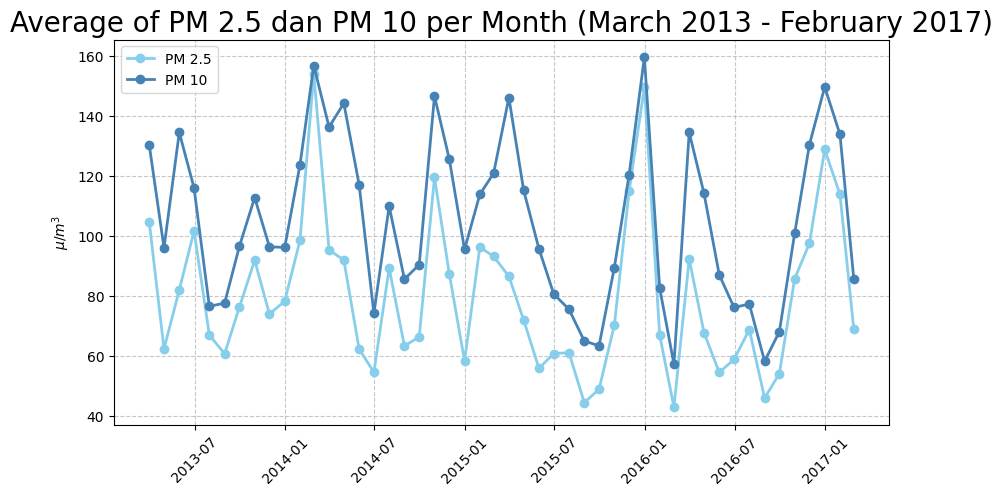

In [101]:
# Ambil data rata-rata nilai PM 2.5 dan PM 10 per bulan. 
monthly_PM25_mean_df = PRSA_df.resample(rule='M', on='date')["PM2.5"].mean().reset_index()
monthly_PM10_mean_df = PRSA_df.resample(rule='M', on='date')["PM10"].mean().reset_index()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(monthly_PM25_mean_df["date"], monthly_PM25_mean_df["PM2.5"], marker='o', linewidth=2, color="skyblue", label="PM 2.5")
ax.plot(monthly_PM10_mean_df["date"], monthly_PM10_mean_df["PM10"], marker='o', linewidth=2, color="steelblue", label="PM 10")
ax.set_title("Average of PM 2.5 dan PM 10 per Month (March 2013 - February 2017)", fontsize=20)
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.set_ylabel(r"$\mu / m^3$", fontsize=10)
ax.grid(True, linestyle="--", alpha=0.7)
ax.legend()

**Insight**
- Tidak ada tren pada rata-rata kadar PM 2.5 dan PM 10 per bulan.
- Tidak terdapat musiman yang spesifik pada rata-rata kadar PM 2.5 dan PM 10 per bulan. Namun beberapa kali nilai tertinggi terjadi di tiap tahunnya terjadi kisaran bulan Januari-Februari dan nilai terendahnya di kisaran bulan Juli-September.
- Dipilihnya diagram garis untuk melihat apakah ada tren atau musiman pada data rata-rata kadar PM 2.5 dan PM 10 per bulan.

Text(0, 0.5, '($\\mu g/m^3$)')

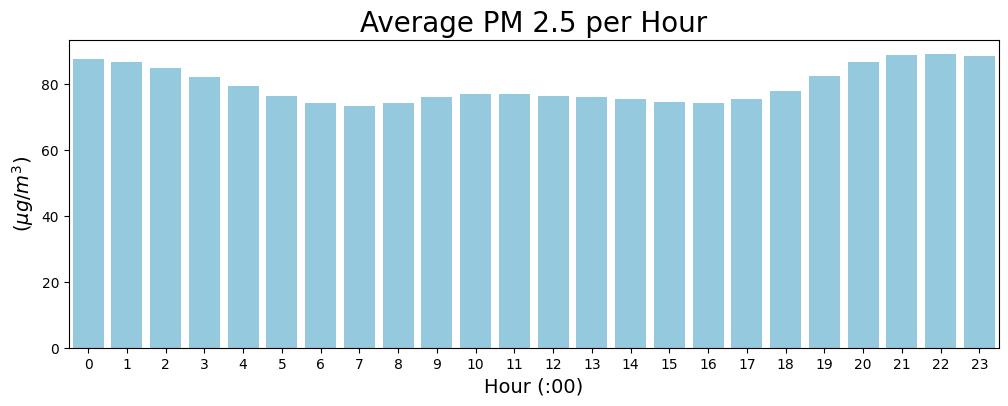

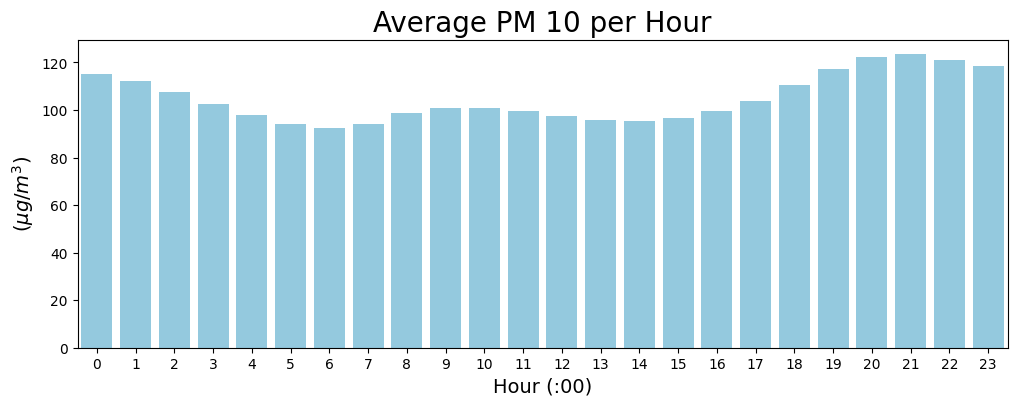

In [39]:
hour_mean_PM25_df = PRSA_df.groupby("hour")["PM2.5"].mean()
hour_mean_PM10_df = PRSA_df.groupby(by="hour")["PM10"].mean()

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x=hour_mean_PM25_df.index, y=hour_mean_PM25_df.values, color="skyblue", ax=ax)
ax.set_title(f"Average PM 2.5 per Hour", fontsize=20)
ax.set_xlabel("Hour (:00)", fontsize=14)
ax.set_ylabel(r"($\mu g/m^3$)", fontsize=14) 


# Grafik 2: Rata-rata PM 10 per jam

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x=hour_mean_PM10_df.index, y=hour_mean_PM10_df.values, color="skyblue", ax=ax)
ax.set_title(f"Average PM 10 per Hour", fontsize=20)
ax.set_xlabel("Hour (:00)", fontsize=14)
ax.set_ylabel(r"($\mu g/m^3$)", fontsize=14) 

**Insight**
- Pemelihan penggunaan diagram batang pada visualisasi data nilai rata-rata PM 2.5 dan 10 per jam dikarenakan kita ingin melihat seberapa besar nilai rata-rata kadar PM 2.5 dan PM 10 di tiap jamnya agar lebih terlihat perbandingannya antar jamnya. Penggunaan diagram garis akan menimbulkan ketidakjelasan pada visualisasi dan sulit untuk melihat distribusi data.
- Nilai maksimum rata-rata kadar PM 2.5 per jam terjadi pada jam 22:00 dan untuk PM 10 terjadi pada jam 21:00. Hal ini pasti berkaitan dengan aktivitas masyarakat di sekitar stasiun seperti kesibukan lalu lintas dan kendaraan bermotor. Hasil ini selaras dengan hasil pada bagain explanatory data.

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
C:\Users\asus\AppData\Local\Temp\ipykernel_11428\418279541.py:16: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title(f"Average of {elemen} per Month (March 2013 - February 2017) ($\mu g/m^3$)", fontsize=20)
C:\Users\asus\AppData\Local\Temp\ipykernel_11428\418279541.py:28: SyntaxWarning: invalid escape sequence '\m'
  ax.set_title(f"Average ${elemen}$ per Hour ($\mu g/m^3$)", fontsize=20)
C:\Users\asus\AppData\Local\Temp\ipykernel_11428\418279541.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_df = PRSA_df.resample(rule='M', on='date')[elemen].mean().reset_index()
C:\Users\asus\AppData\Local\Temp\ipykernel_11428\418279541.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please 

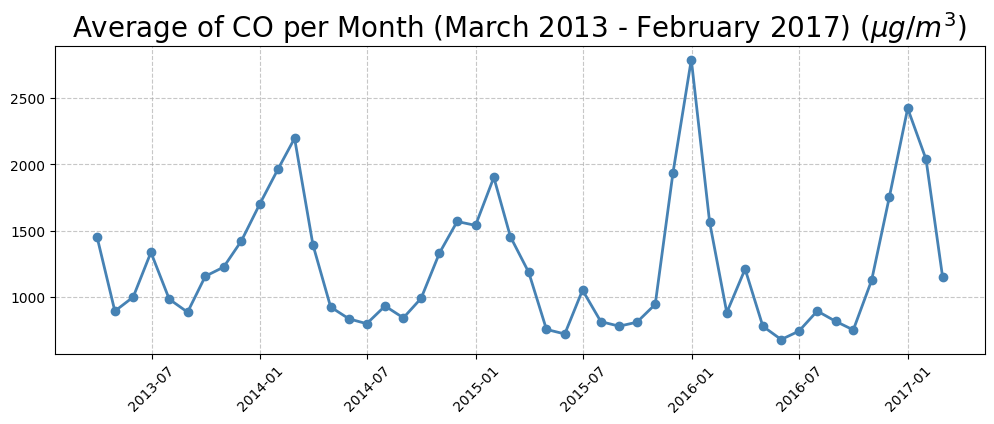

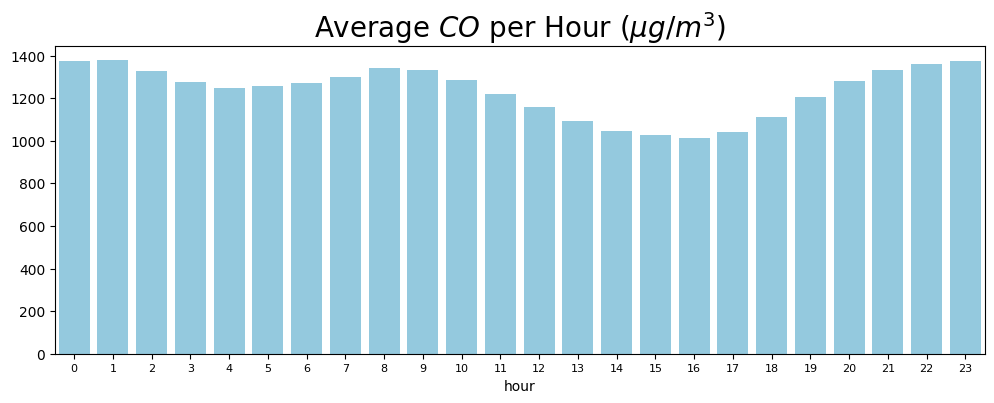

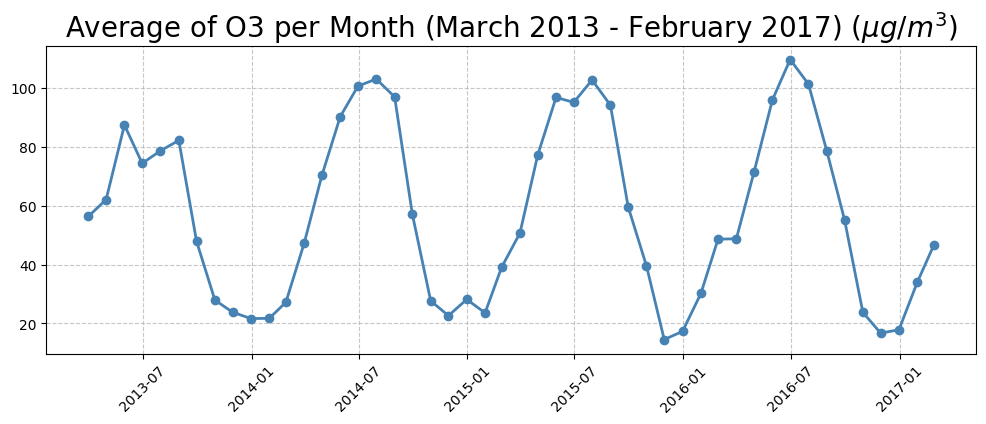

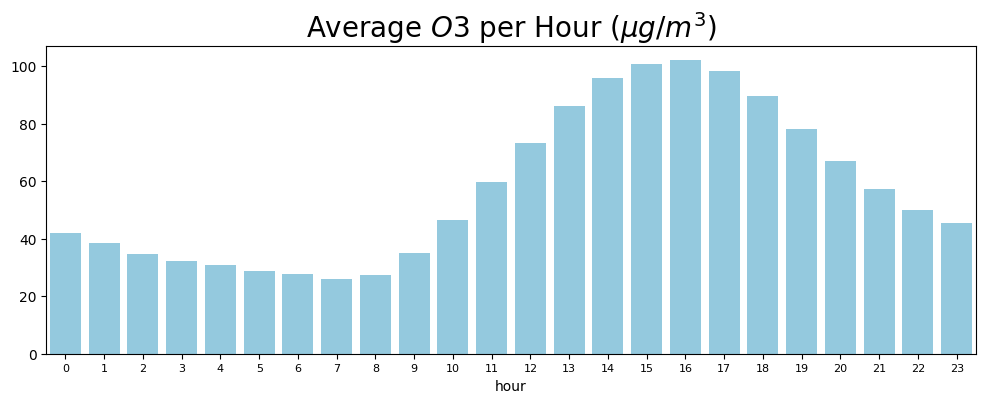

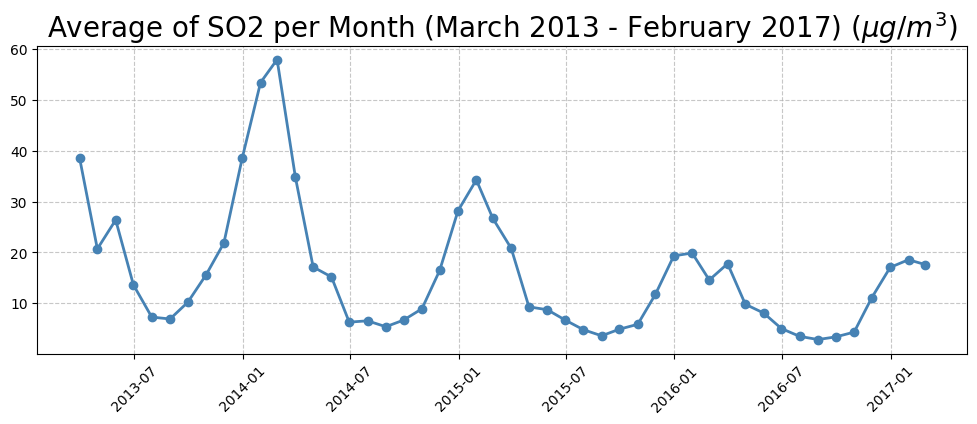

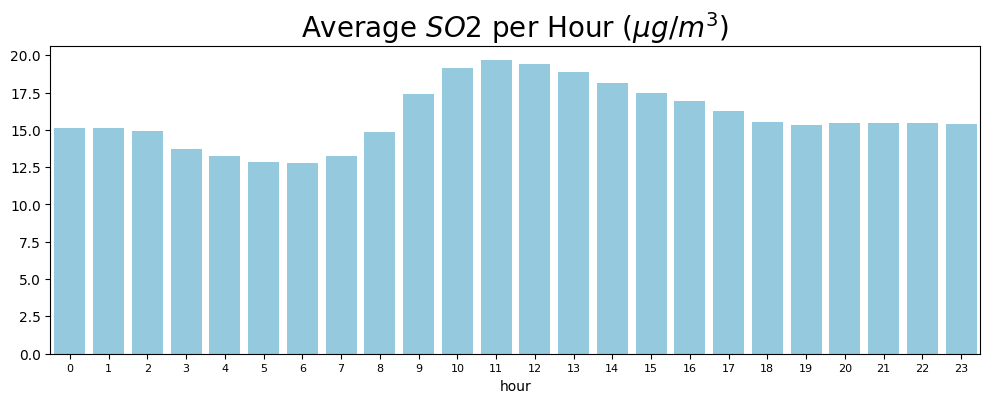

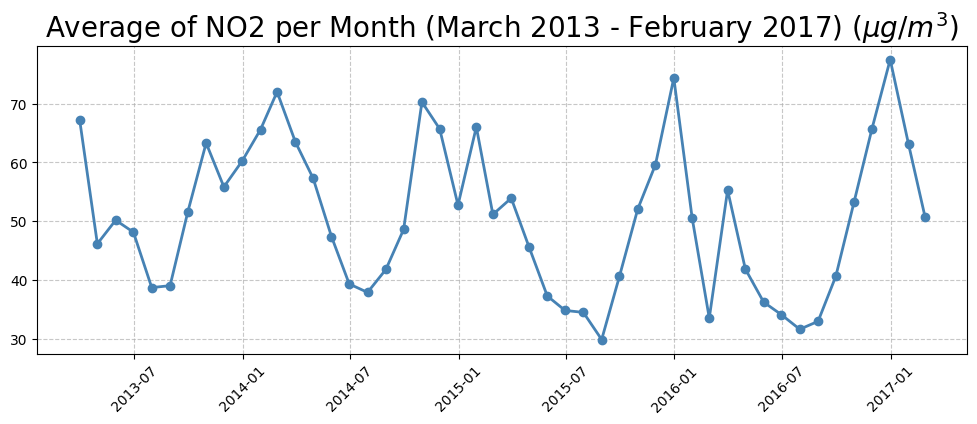

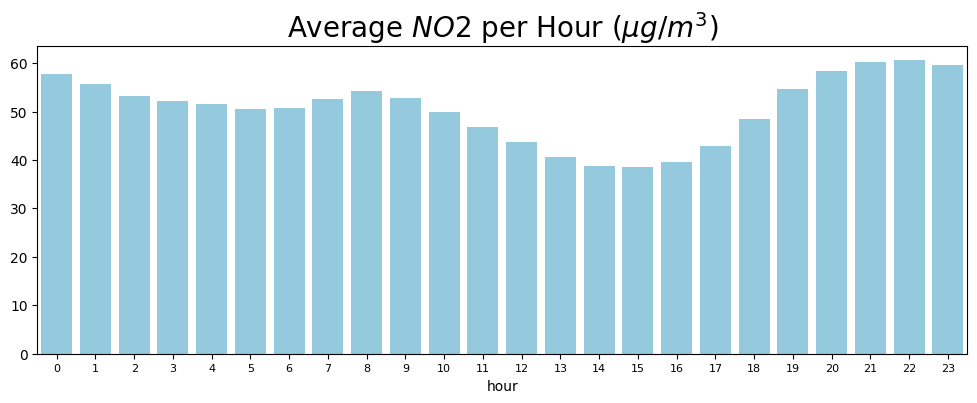

In [82]:
unsur = ["CO", "O3", "SO2", "NO2"]

for elemen in unsur:
    monthly_mean_df = PRSA_df.resample(rule='M', on='date')[elemen].mean().reset_index()
    yearly_mean_df = PRSA_df.resample(rule='Y', on='date')[elemen].mean().reset_index()
    hour_mean_df = PRSA_df.groupby(by="hour")[elemen].mean()

    latest_month = monthly_mean_df["date"].max().strftime("%B %Y")
    latest_value = monthly_mean_df.iloc[-1][elemen]
    delta_elemen = latest_value-monthly_mean_df.iloc[-2][elemen]

    # Membuat grafik timeseries untuk rerata per bulan

    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(monthly_mean_df["date"], monthly_mean_df[elemen], marker='o', linewidth=2, color="steelblue")
    ax.set_title(f"Average of {elemen} per Month (March 2013 - February 2017) ($\mu g/m^3$)", fontsize=20)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.grid(True, linestyle="--", alpha=0.7)

    # Membuat grafik distribusi untuk rerata per jam

    indexOfMaksimumMean = hour_mean_df.idxmax()
    highest_hour = indexOfMaksimumMean 
    highest_value = hour_mean_df.loc[highest_hour]

    fig, ax = plt.subplots(figsize=(12, 4))
    sns.barplot(x=hour_mean_df.index, y=hour_mean_df.values, color="skyblue")
    ax.set_title(f"Average ${elemen}$ per Hour ($\mu g/m^3$)", fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)


**Insight**
- Nilai rata-rata CO per bulan tertinggi pada bulan Desember 2010, dan nilai rata-rata per jam pada jam 01:00 malam
- Nilai rata-rata O3 per bulan tertinggi pada bulan Juli 2016, dan nilai rata-rata per jam pada jam 16:00 sore
- Nilai rata-rata SO2 per bulan tertinggi pada bulan Juli 2015, dan nilai rata-rata per jam pada jam 11:00 siang
- Nilai rata-rata NO2 per bulan tertinggi pada bulan Juli 2016, dan nilai rata-rata per jam pada jam 22:00 malam
- Perbedaan nilai rata-rata perjam dandapat dilihat sangat jelas dengan menggunakan barplot

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\asus\AppData\Local\Temp\ipykernel_11428\1118204605.py:10: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel(f"{elemen} ($\mu g/m^3$)", fontsize=14)


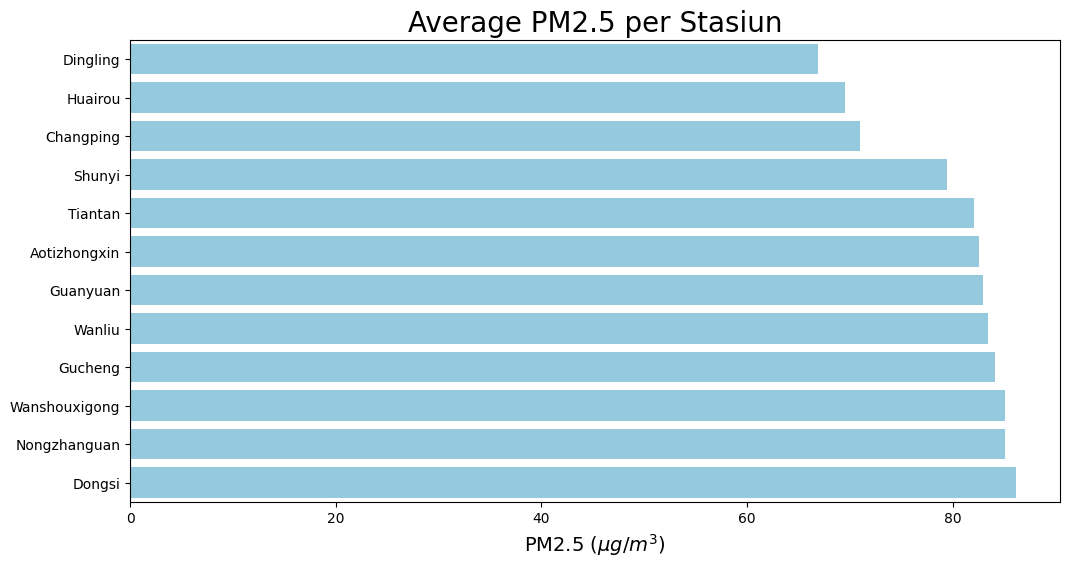

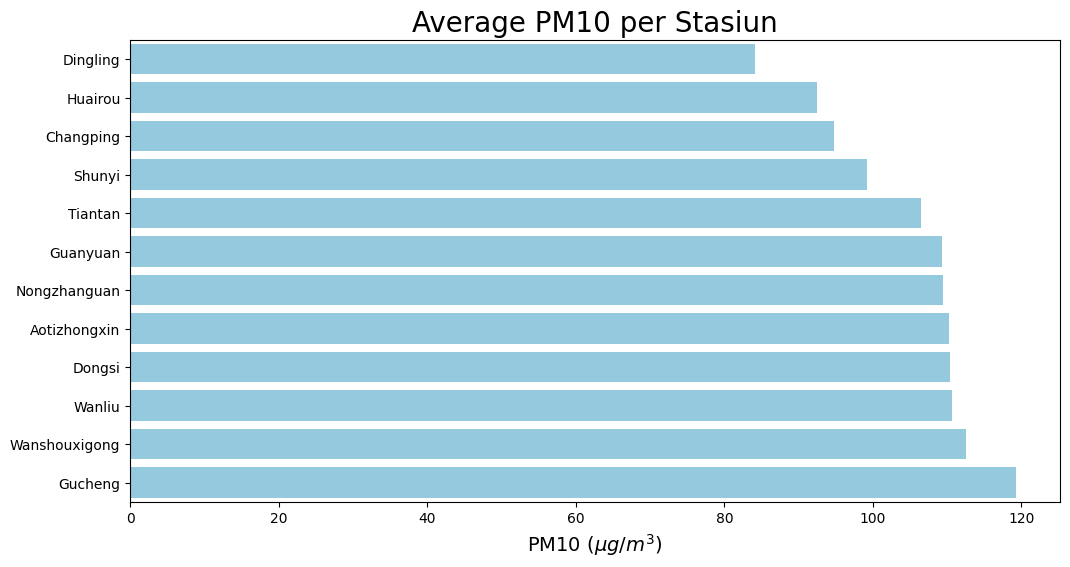

In [108]:
unsur = ["PM2.5", "PM10"]

for elemen in unsur:

    average_per_station = PRSA_df.groupby(by="station")[elemen].mean().sort_values()

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x=average_per_station.values, y=average_per_station.index, color='skyblue')
    ax.set_title(f"Average {elemen} per Stasiun", fontsize=20)
    ax.set_xlabel(f"{elemen} ($\mu g/m^3$)", fontsize=14) 
    ax.set_ylabel("")

**Insight**
- Digunakan diagram batang untuk melihat stasiun mana yang memiliki nilai rata-rata PM 10 dan PM 2.5 tertinggi hingga terendah.
- Hasil yang diperoleh selaras dengan hasil pada exploratory data sebelumnya, dimana stasiun yang paling tinggi nilai rata-rata PM 2.5 nya adalah stasiun Dongsi dan yang terendah adalah stasiun Dingling. Untuk PM 10, nilai tertinggi dicapai oleh stasiun Gucheng dan yang terendah yaitu stasiun Dingling.

### Pertanyaan 2:
 Apakah faktor alam seperti hujan, tekanan dan temperatur mempengaruhi kadar unsur yang mencemari udara di stasiun china tersebut?

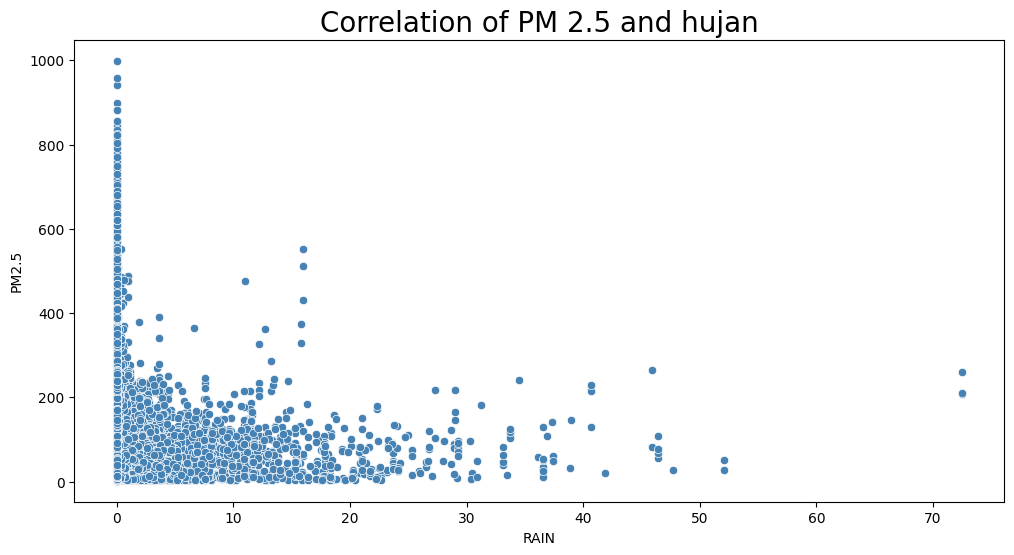

Korelasi antara PM 2.5 dan hujan: -0.014452037420056957 
 


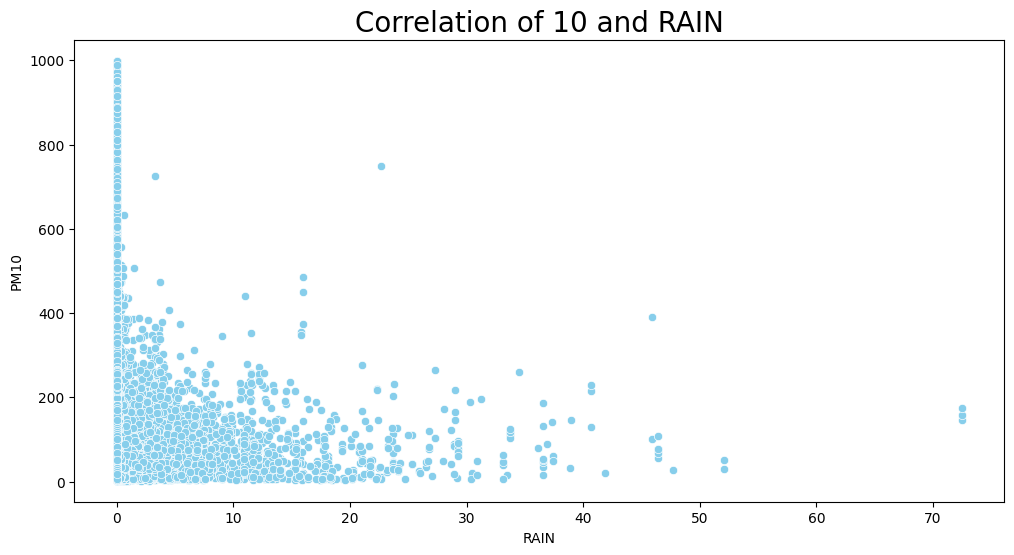

Korelasi antara PM 10 dan hujan: -0.13160664167309155 
 


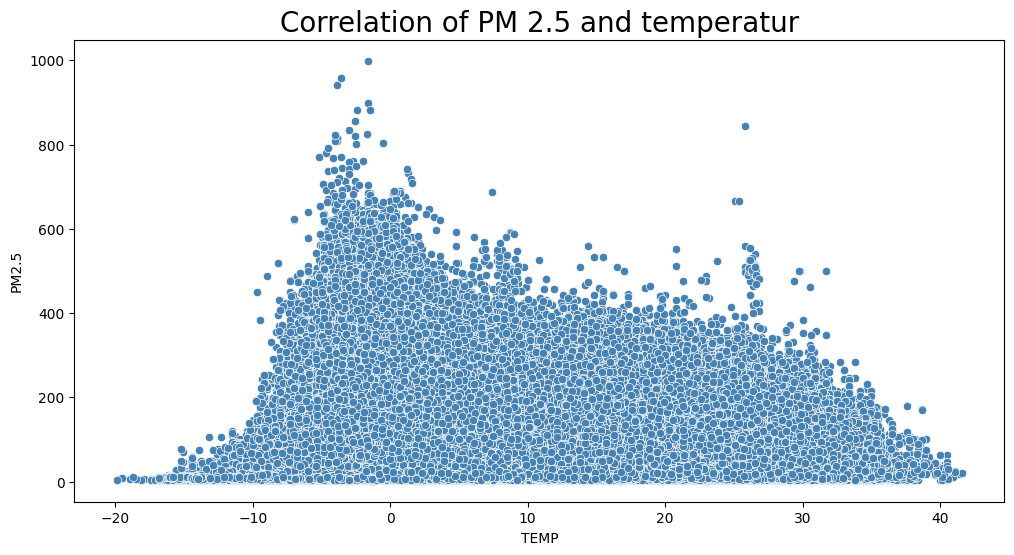

Korelasi antara PM 2.5 dan temperatur: -0.014452037420056957 
 


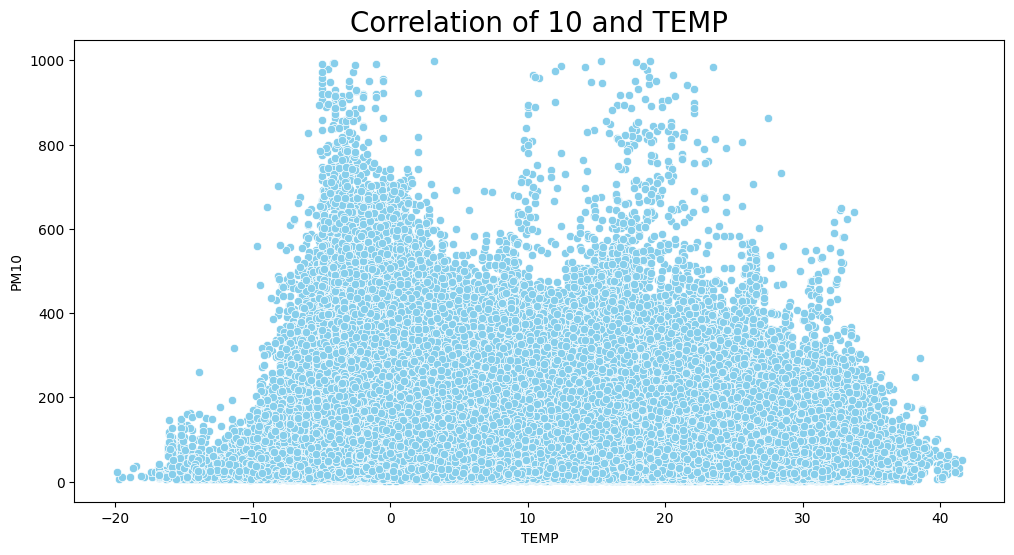

Korelasi antara PM 10 dan temperatur: -0.13160664167309155 
 


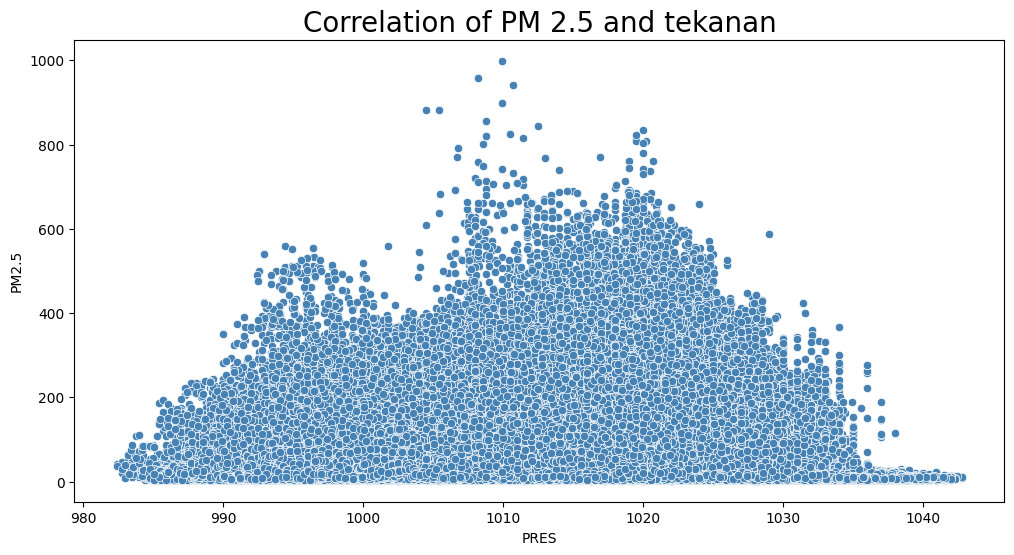

Korelasi antara PM 2.5 dan tekanan: -0.014452037420056957 
 


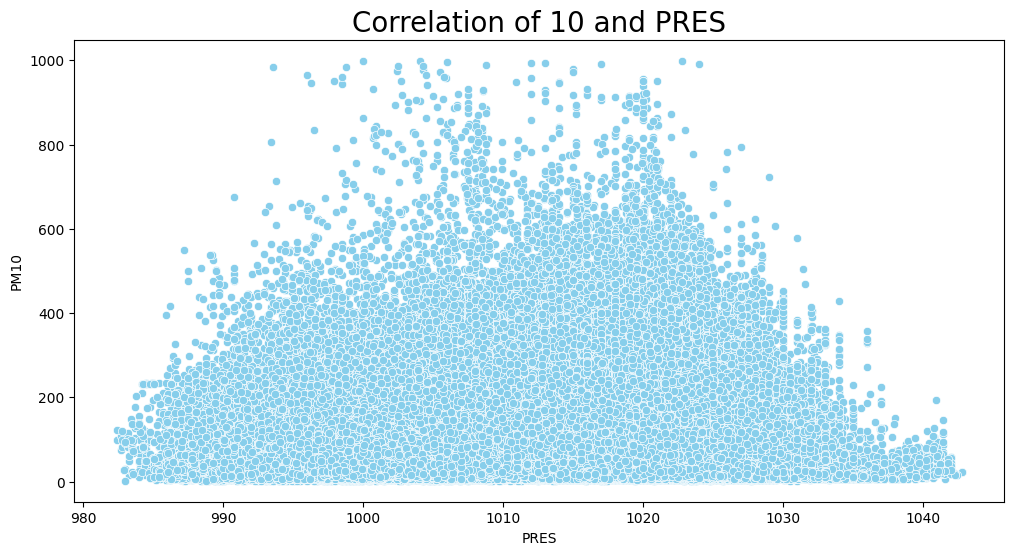

Korelasi antara PM 10 dan tekanan: -0.13160664167309155 
 


In [98]:
nature = ["RAIN", "TEMP", "PRES"]
nature_title = ["hujan", "temperatur", "tekanan"]

for idx, elemen in enumerate(nature):    

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.scatterplot(data=PRSA_df,
                    x=elemen, 
                    y="PM2.5",
                    facecolor="steelblue")
    ax.set_title(f"Correlation of PM 2.5 and {nature_title[idx]}", fontsize=20)
    plt.show()
    corr_value = PRSA_df["PM2.5"].corr(PRSA_df["RAIN"])
    print(f"Korelasi antara PM 2.5 dan {nature_title[idx]}: {corr_value} \n ")

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.scatterplot(data=PRSA_df,
                    x=elemen,
                    y="PM10", facecolor="skyblue")
    ax.set_title(f"Correlation of 10 and {elemen}", fontsize=20)
    plt.show()
    corr_value = PRSA_df["PM2.5"].corr(PRSA_df["TEMP"])
    print(f"Korelasi antara PM 10 dan {nature_title[idx]}: {corr_value} \n ")

**Insight:**
- Dari grafik korelasi, hujan, temperatur dan tekanan tidak membentuk garis lurus dengan kadar-kadar unsur polutan. Masing-masing nilai korelasinya pun mendekati nilai 0. Dengan demikian, tidak ada hubungan anatara faktor alam yaitu curah hujan, temperatur dan tekanan terhadap PM 2.5, PM 10, SO2, NO4, O3 dan CO.

## Analisis Lanjutan : Analisis Geospasial

Tujuan : Menganalisis apakah ada kaitan tingkat PM 2.5 pada satu stasiun dengan stasiun lainnya berdasarkan kedekatan jarak pada letak geografis.
Tahapan :
1. Mencari koordinat stasiun, dengan mencari lot dan lan masing-masing stasiun.
2. Jadikan daftar koordinat stasiun menjadi sebuah data frame.
3. Buat dataframe baru yang berisi nilai rata-rata PM 2.5 untuk tiap stasiun.
4. Gabungkan dataframe pada no 2 dan no 3.
5. Buata peta geospasial berdasarkan dataframe no 4. Beri status/ level kadar PM 2.5 tiap stasiun dengan memanfaatkan nilai rata2 PM 2.5 per stasiun.
6. Berikan titik penanda serta keterangan nama untuk stasiun dengan memanfaatkan koordinat yang telah diperoleh. Beri warna sesuai level PM 2.5 yang telah dibuat pada no 5.

In [92]:
import folium
import pandas as pd
from geopy.geocoders import Nominatim

# Inisialisasi geocoder
geolocator = Nominatim(user_agent="geoapi")

# Daftar nama stasiun
stasiun_list = [
    "Aotizhongxin","Changping","Dingling","Dongsi","Guanyuan","Gucheng","Huairou",
    "Nongzhanguan","Shunyi","Tiantan","Wanliu","Wanshouxigong"
]

# Fungsi untuk mendapatkan koordinat
def get_coordinates(stasiun):
    location = geolocator.geocode(stasiun)
    if location:
        return location.latitude, location.longitude
    return None, None

df = pd.DataFrame({"stasiun": stasiun_list})
df["lat"], df["lon"] = zip(*df["stasiun"].apply(get_coordinates))
df.loc[df["stasiun"] == "Wanshouxigong", ["lat", "lon"]] = (39.8865, 116.3524)

average_PM25_per_station = PRSA_df.groupby("station")["PM2.5"].mean().reset_index()
average_PM25_per_station = average_PM25_per_station.rename(columns={"station": "stasiun"})

df_combined = pd.merge(df, average_PM25_per_station, on="stasiun")

print(df_combined)


          stasiun        lat         lon      PM2.5
0    Aotizhongxin  34.374734  109.016205  82.540623
1       Changping  40.219646  116.225091  70.986438
2        Dingling  40.162427  117.653096  66.845557
3          Dongsi  39.929247  116.417731  86.144243
4        Guanyuan  29.558719  112.007610  82.897522
5         Gucheng  37.349035  115.964682  84.074802
6         Huairou  40.315481  116.626028  69.501747
7    Nongzhanguan  39.942563  116.460106  85.079472
8          Shunyi  40.148750  116.653875  79.437962
9         Tiantan  39.887858  116.392896  82.033097
10         Wanliu  39.989313  116.289428  83.467612
11  Wanshouxigong  39.886500  116.352400  85.067548


In [107]:
# Buat peta dengan peta China
m = folium.Map(location=[35, 116.4], zoom_start=5.5, tiles="OpenStreetMap")


# Tambahkan titik stasiun dengan warna
for _, row in df_combined.iterrows():
    if row["PM2.5"] < 70:
        color = "green"
    elif row["PM2.5"] < 80:
        color = "orange"
    else:
        color = "red"
    
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=8,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{row['stasiun']}<br>PM2.5: {row['PM2.5']:.2f}"
    ).add_to(m)
    
    folium.Marker(
        location=[row["lat"] + 0.02, row["lon"]],
        icon=folium.DivIcon(
            icon_size=(120,30),
            icon_anchor=(0,0),
            html=f'<div style="font-size: 11pt; color: black; background: white; padding: 1px; border-radius: 5px; font-weight: bold;">'
                 f'<b>{row["stasiun"]}</b></div>'
        )
    ).add_to(m)

display(m)

**Insight:**
Terdapat kesamaan level PM 2.5 pada stasiun yang berdekatan.  Terlihat untuk stasiun wangliau hingga ke stasiun ayng ada di bagian selatannya memeiliki stastus merah yang artinya kadar PM 2.5 dalam level bahaya. Stasiun yang berada di bagian tengah, yaitu stasiun Changping dan Shunyi berstatus oranye yang artinya kadar PM 25 dalam level sedang. Stasiun di bagian utara, yaitu stasiun Huariou dan Dingling berada di level aman dan berstatus hijau. Dengan demikian, letak geografis dapat menjadi salah satu faktor tingkat polusi suatu wilayah,  wilayah yang berdekatan maupun berada di geografis yang searah akan memeiliki potensi polusi yang serupa. Hal ini dapat diakibatkan oleh arah angin dikarenakan angin dapat membawa polusi dan menghantarkannya ke daerah dimana angin bergerak.


## Conclusion

- Conclution pertanyaan 1:

1. Jika dilihat dari pergerakan rata-rata kadar unsur dalam polutan perbulan di grafik, dapat dilihat bahwa kadar PM 2.5 pada tahun 2017 cukup menurun daripada tahun 2016 namun masih lebih tinggi dibanding pada tahun 2013-2015. Dalam hal ini tidak ada tren atau musiman untuk rata-rata PM 2.5 perbulan. Pencemaran udara pada tahun 2013-2017 mencapai nilai tertinggi di kisaran bulan Januari-Februari dan nilai terendahnya di kisaran bulan Juli-September.
2. Kadar PM 10 tidak memiliki tren atau musiman. Kadar PM 10 pada tahun 2017 tidak jauh berbeda dengan tahun-tahun sebelumnya. Sama halnya dengan kadar PM 2.5, PM 10 mencapai titik tertinggi dan terendah pada rentang bulan tersebut.
3. Kadar O3 sudah lebih menurun daripada tahun 2016. Kadar PM 10 memiliki musiman dimana nilainya meningkat mulai bulan januari atau bulan sekitarnya dan menurun pada bulan juli atau sekitarnya. rata-rataper bulan tertinggi pada bulan Juli 2016, dan per jam pada jam 16:00 sore
3. Kadar SO2 menurun pada tahun 2017 dibanding tahun-tahun sebelumnya. Terdapat tren menurun pada kadar SO2 ini. Nilai rata-rata per bulan tertinggi pada bulan Juli 2015, dan nilai rata-rata per jam pada jam 11:00 siang.
4. Kadar NO2 pada tahun 2017 tidak jauh berbeda dengan tahun-tahun sebelumnya. Nilai rata-rata per bulan tertinggi pada bulan Januari 2027 dan per jam pada jam 22:00 malam.
5. Kadar CO pada tahun 2017 masih tinggi dibanding tahun sebelum-sebelumnya, meskipun demikian sedikit lebih menurun dari tahun 2016. Rata-rata CO per bulan tertinggi pada bulan Desember 2010, dan nilai rata-rata per jam pada jam 01:00 malam
6. Stasiun yang paling tinggi nilai rata-rata PM 2.5 nya adalah stasiun Dongsi dan yang terendah adalah stasiun Dingling. Untuk PM 10, nilai tertinggi dicapai oleh stasiun Gucheng dan yang terendah yaitu stasiun Dingling.

- Conclution pertanyaan 2:

Nilai korelasi antara hujan, temperatur, dan tekanan udara terhadap PM 2.5, PM 10, SO2, NO2, CO, dan O3 mendekati 0. Dengan demikian, tidak ada hubungan signifikan antara faktor alam (hujan, temperatur, dan tekanan udara) dengan unsur-unsur yang terkandung dalam polusi tersebut. 

Berdasarkan analisis geospasial, lokasi stasiun dapat mempengaruhi status pencemaran udara. Stasiun yang berdekatan sangat memungkinkan untuk berada di level yang sama, hal ini dapat terjadi akibat angin yang menghembus membawa polusi dari satu stasiun ke stasiun lainnya.